# Task 1: Data Preprocessing for Machine Learning  
**Internship:** Codveda Technologies  
**Intern:** Diya Agarwal  
**Duration:** 27/08/2025 - 27/09/2025  

---

## 📌 Objective
The goal of this task is to preprocess a raw dataset to make it ready for machine learning.  
Dataset used: **Iris dataset** (150 samples, 4 features, 3 species).  

---

## 🔹 Steps Performed

1. **Load Dataset**  
   - Imported the Iris dataset using `pd.read_csv`  

2. **Handle Missing Data**  
   - Checked dataset for missing/null values  
   - No missing values were found in Iris dataset  

3. **Encode Categorical Variables**  
   - Encoded the target variable (`species`) using **LabelEncoder**  
   - Classes:  
     - setosa → 0  
     - versicolor → 1  
     - virginica → 2  

4. **Train-Test Split**  
   - Split data into **training (80%)** and **testing (20%)** sets  
   - Ensured scaling was fitted only on training data to prevent data leakage  


5. **Standardization of Numerical Features**  
   - Applied **StandardScaler** to standardize numerical features  
   - Features rescaled to mean = 0 and std = 1  

---

## 📂 Tools & Libraries Used
- Python  
- Pandas   
- Scikit-learn  

---

## ✅ Outcome
- Successfully preprocessed the Iris dataset  
- Ready for use in machine learning models  


## Importing libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



## Step -1 : Loading the dataset

In [40]:
df = pd.read_csv("iris.csv")

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualising the data

In [42]:
df.describe()
df.shape

(150, 5)

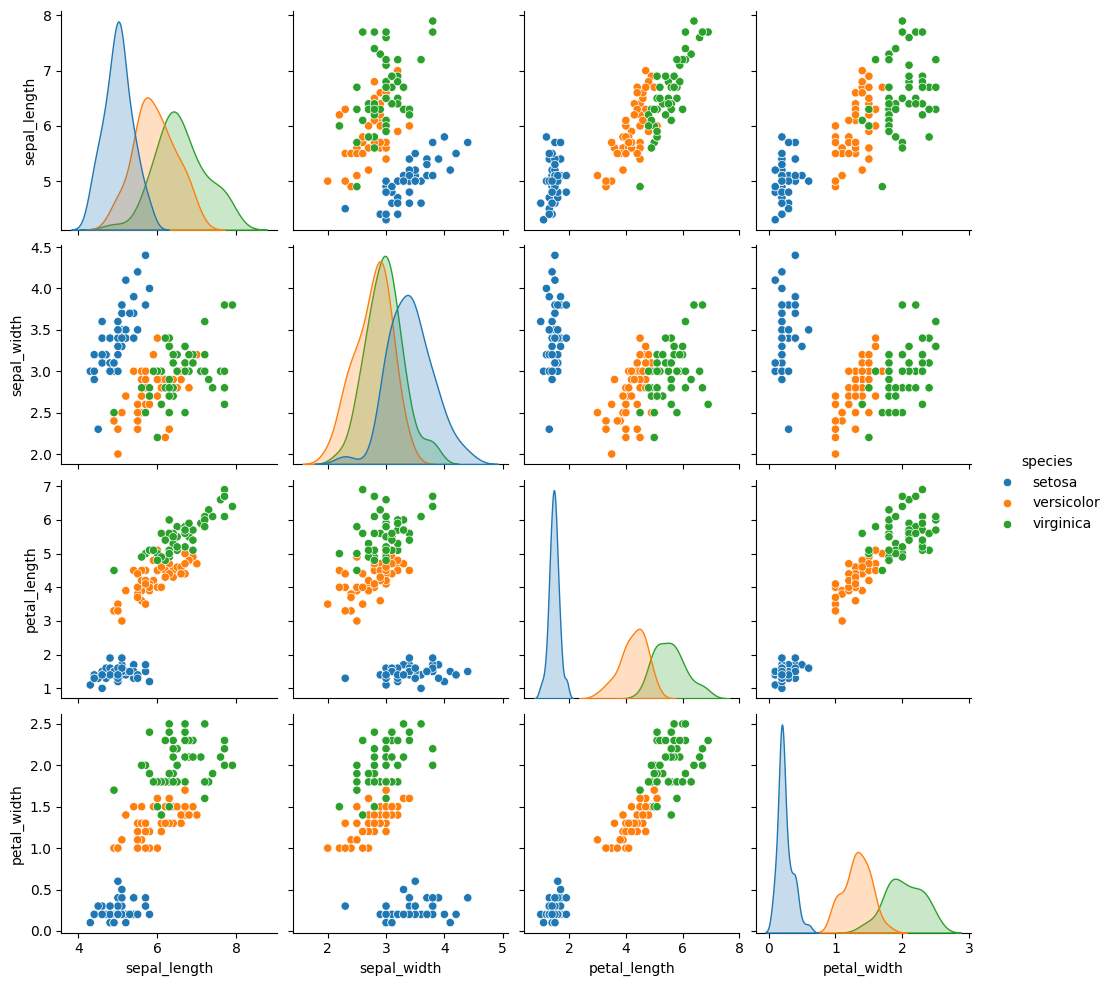

In [43]:
sns.pairplot(df,hue = 'species')

## Step- 2: Handle Missing and Duplicated Values
Data has no missing values. 

In [44]:
df.isnull().sum()
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

## Visualising

In [45]:
# create list of colors and labels
colors = ['red','orange','blue']
species = df['species'].unique()


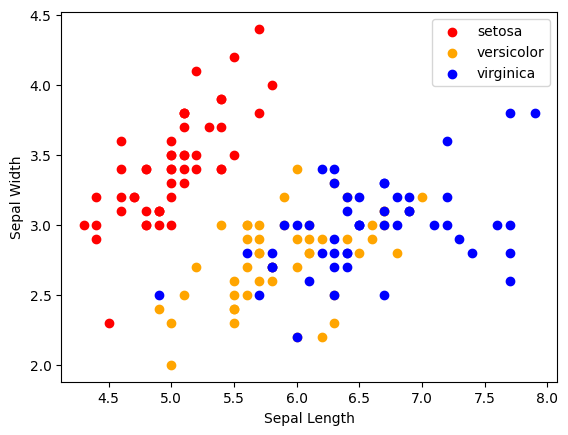

In [46]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], color=colors[i] ,label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


## Step -3: Label Encoder

In [47]:
le = LabelEncoder()

# Transform the string labels to integer
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Separate Input columns and Output Columns


In [48]:
# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]


## Step -4: Splitting the data into Training and Test data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

## Step -5 : Standardization of Numerical Features

In [50]:
scaler = StandardScaler()

scaler.fit(X_train)

# Transform both sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Convert back to DataFrame:

In [51]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Task 3 - KNN Classifier

- Trained KNN with k = 3, 5, 7, 9
- Evaluated using Accuracy, Confusion Matrix, Classification Report

## KNN classifier

### Train and Evaluate KNN with different k

In [52]:
target_names = ["setosa", "versicolor", "virginica"]

for k in [3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\nResults for k = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))



Results for k = 3
Accuracy: 1.0
Confusion Matrix:
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Results for k = 5
Accuracy: 1.0
Confusion Matrix:
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Results for

## 📊 Results
- For **K = 3, 5, 7, 9**, the model achieved:
  - **Accuracy:** 100%
  - Perfect classification on all 3 classes (`setosa`, `versicolor`, `virginica`).
- Confusion matrix showed no misclassifications.
- Classification report metrics were all **1.0 (perfect)**.

### Correlation between the features

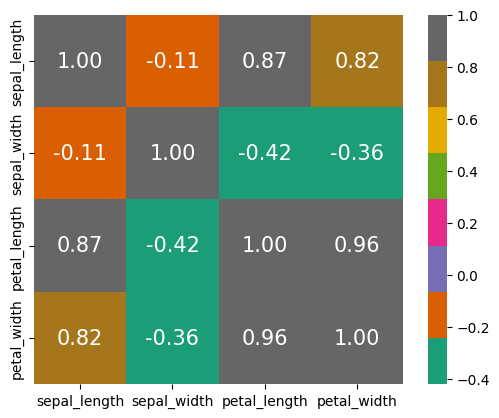

In [53]:
cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

From the above matrix it is seen that Petal Length and Width show a strong coorelation whereas the Sepal Length and Width show weak correlations, it indicates that the Species can be identified better using Petal compared to Sepal,we will verify the same using Machine Learning

# LEVEL: Intermediate - Task 2

## Decision Trees for Classification


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [55]:

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )

model.fit(X_train_scaled,y_train)

# print('Training Accuracy Sepal = {}'.format(model.score(X_train_scaled, y_train)))
# print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_scaled, y_test)))



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Plotting of Decision Tree

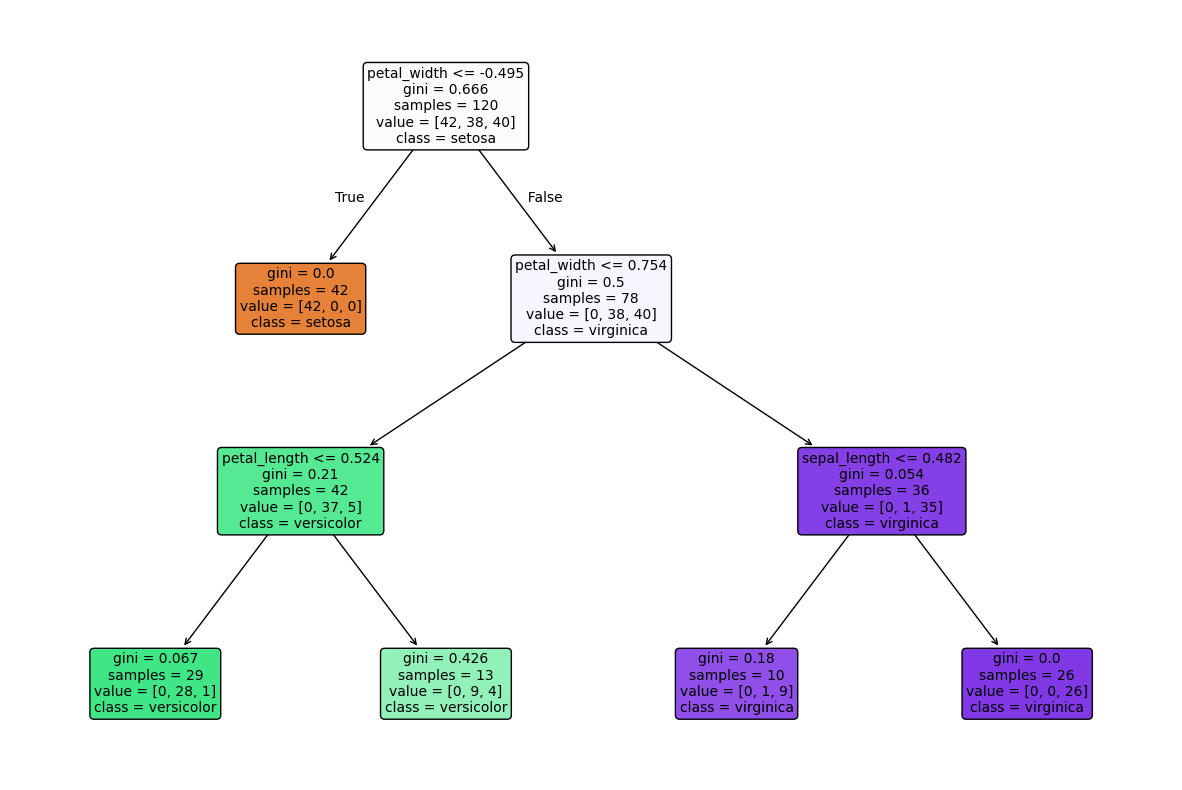

In [56]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=le.classes_, 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()


### Decision Tree Classifier (Baseline Model)

In [57]:
# Defining an object for modelC and fitting for train dataset
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [58]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  1.0


1) The accuracy of the DT has slightly overfit
2) Shall try hyperparameter tuning to reduce overfitting if possible

In [59]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Hyperparameter Tuning

In [60]:
# Hyperparameter Tuning of DTC

model = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(model, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Observation: Best parameters found → prevents overfitting.

In [61]:
# Passing best parameter for the Hyperparameter Tuning
model = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [62]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[42  0  0]
 [ 0 38  0]
 [ 0  1 39]]

 Confusion Matrix - Test: 
 [[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [63]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Final Model Evaluation

In [64]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9916666666666667
Accuracy of Decision Tree-Test:  1.0


After hyperparameter tuning we can say the overfitting has been reduced slightly

# Task 3: K-Means Clustering

In [ ]:
from sklearn import datasets 
from sklearn.cluster import KMeans



### Determine the optimal number of clusters using the elbow method

In [69]:
inertia = []
K = range(1, 11)  # testing 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

### Plot the elbow

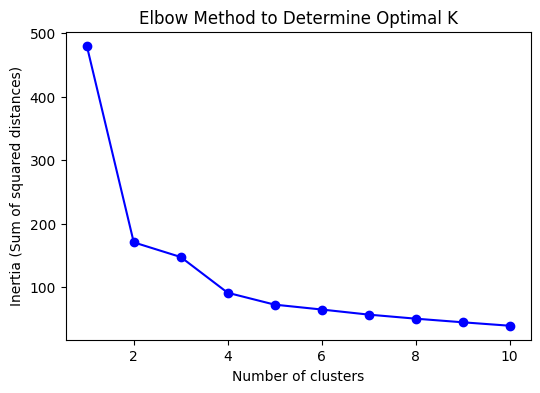

In [70]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

### Apply K-Means with chosen K 

In [78]:
features = ['sepal_length', 'sepal_width', 'petal_length','petal_width']

In [ ]:
optimal_k = 3  # set based on elbow plot
kmeans = KMeans(n_clusters = optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_scaled)


In [79]:
#Add cluster labels to our DataFrame
df_train = pd.DataFrame(X_train_scaled, columns = features)
df_train['Cluster'] = y_kmeans


In [80]:
print(df_train.head())

   sepal_length  sepal_width  petal_length  petal_width  Cluster
0      0.179332    -1.991033      0.157502    -0.232385        1
1     -0.908752     0.526365     -1.140123    -0.890077        2
2     -1.029650     0.755219     -1.196541    -1.021615        2
3     -0.666955     1.441782     -1.252960    -1.284692        0
4     -1.392345     0.297511     -1.365797    -1.284692        2


### Visualize clusters in 2D

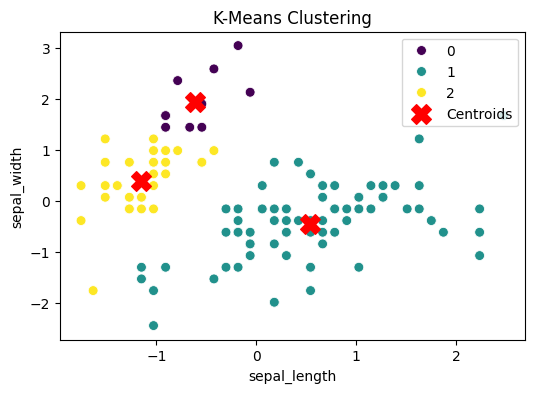

In [83]:
plot_df = pd.DataFrame(X_train_scaled, columns=features)
plot_df['Cluster'] = y_kmeans

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=plot_df,
    x=features[0],
    y=features[1],
    hue='Cluster',
    palette='viridis',
    s=50
)

plt.scatter( 
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1], 
    s=200, c='red', marker='X', label='Centroids')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-Means Clustering')
plt.legend()
plt.show()

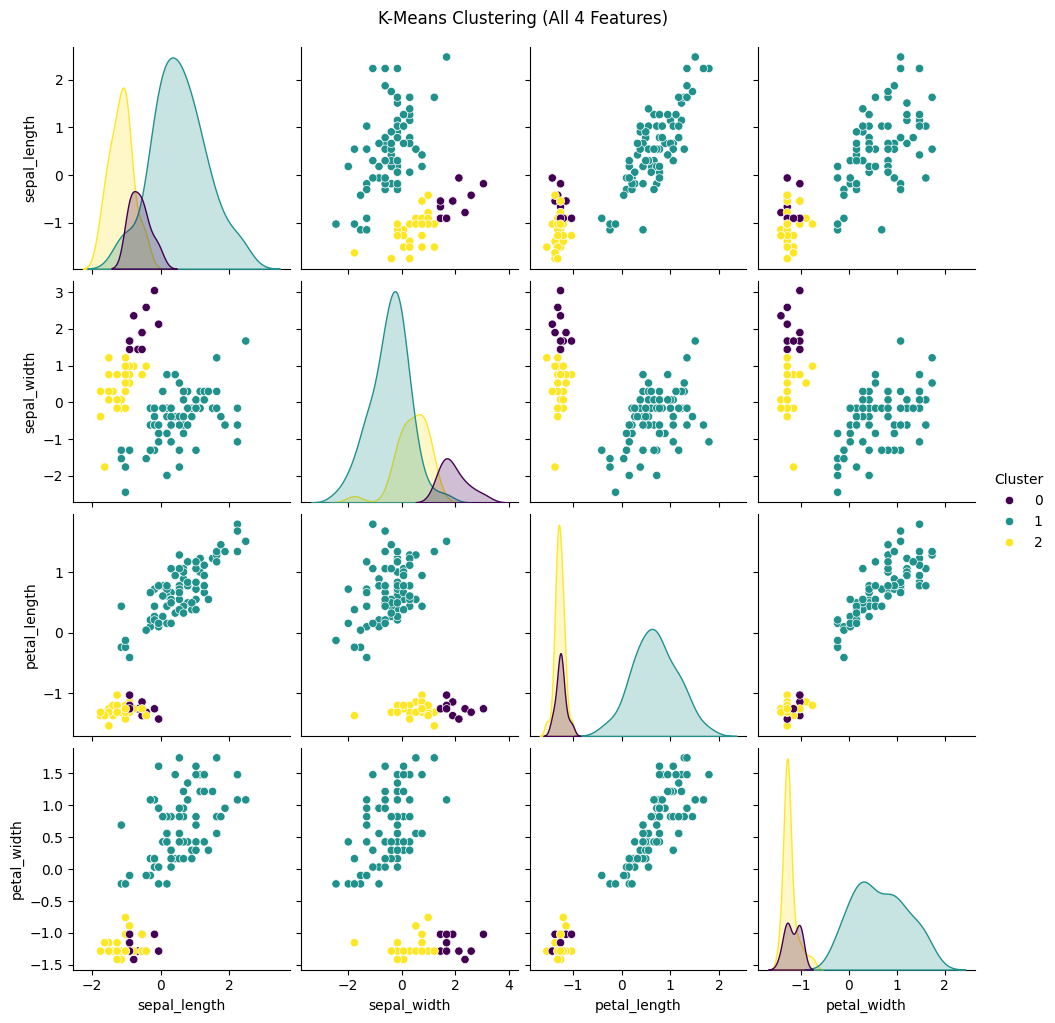

In [86]:
sns.pairplot(plot_df, vars=features, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('K-Means Clustering (All 4 Features)', y=1.02)
plt.show()

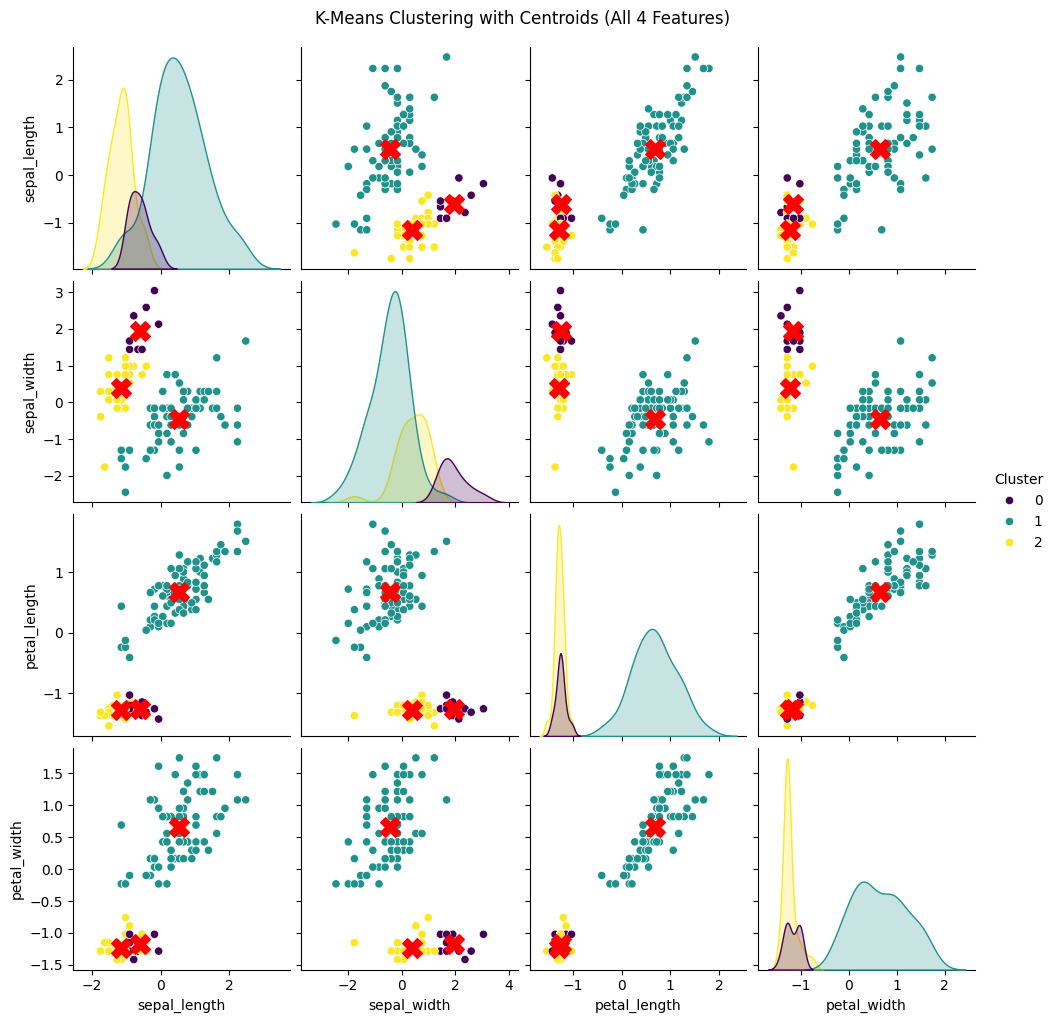

In [87]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids['Cluster'] = range(optimal_k)

# Step 9: Create pairplot
pair_grid = sns.pairplot(plot_df, vars=features, hue='Cluster', palette='viridis', diag_kind='kde')

# Step 10: Overlay centroids on each subplot
for i, row_feature in enumerate(features):
    for j, col_feature in enumerate(features):
        if i != j:
            ax = pair_grid.axes[i, j]
            ax.scatter(centroids[col_feature], centroids[row_feature], 
                       s=200, c='red', marker='X', label='Centroids')
            
plt.suptitle('K-Means Clustering with Centroids (All 4 Features)', y=1.02)
plt.show()

### 📌 Interpretation of Results

Number of Clusters:

The elbow plot suggested 3 clusters, which aligns with the known structure of the Iris dataset (Setosa, Versicolor, Virginica).

Cluster Separation:

From the pairplot, the clusters are well separated in features related to petal length and petal width.

These features provide the strongest discrimination between flower types.

Overlap:

Some overlap is visible between two clusters, especially in sepal-based features.

This means sepal measurements alone are not sufficient for perfect separation.

Centroids (red X):

Show the average position of each cluster.

These centroids represent the “typical” data point for each cluster.

Interpretation Summary:

The K-Means algorithm successfully grouped the data into 3 meaningful clusters.

Cluster 0 corresponds closely to Iris Setosa (clearly separated).

Clusters 1 and 2 correspond to Iris Versicolor and Iris Virginica, which are more similar and show some overlap.

This demonstrates how unsupervised learning can reveal natural groupings in the data even without labels.